In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib as plt

In [2]:
df  = pd.read_csv('Stars.csv')

In [3]:
df.head(5)

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [4]:
df.shape 

(240, 7)

In [5]:
print(df['Color'].unique())
print(df['Spectral_Class'].unique())

['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']
['M' 'B' 'A' 'F' 'O' 'K' 'G']


In [6]:
df.isnull().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

In [7]:
df.Color.value_counts().sort_values(ascending=False)

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
Whitish                 2
Orange                  2
yellowish               2
Pale yellow orange      1
Orange-Red              1
White-Yellow            1
Yellowish               1
Blue-White              1
Name: Color, dtype: int64

In [8]:
col = [x for x in df.Color.value_counts().sort_values(ascending=False).head(17).index]
col

['Red',
 'Blue',
 'Blue-white',
 'Blue White',
 'yellow-white',
 'White',
 'Blue white',
 'white',
 'Yellowish White',
 'Whitish',
 'Orange',
 'yellowish',
 'Pale yellow orange',
 'Orange-Red',
 'White-Yellow',
 'Yellowish',
 'Blue-White']

In [9]:
for label in col:
    df[label] = np.where(df['Color']==label , 1, 0)
df = df.drop(['Color'], axis=1)

In [10]:
df.head(5)

,Temperature,L,R,A_M,Spectral_Class,Type,Red,Blue,Blue-white,Blue White,...,white,Yellowish White,Whitish,Orange,yellowish,Pale yellow orange,Orange-Red,White-Yellow,Yellowish,Blue-White
0,3068,0.002400,0.1700,16.12,M,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3042,0.000500,0.1542,16.60,M,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2600,0.000300,0.1020,18.70,M,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2800,0.000200,0.1600,16.65,M,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1939,0.000138,0.1030,20.06,M,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df = df.drop(['Blue White',
'Blue-White',
'Blue white',
'white',
'White-Yellow',
'Yellowish',], axis=1)
df = df.rename(columns = {'Pale yellow orange':'Pale_yellow_orange','Yellowish White':'Yellowish_White','yellow-white':'yellow_white','Blue-white':'Blue_white'}, inplace = False)

In [12]:
df.Spectral_Class.value_counts().sort_values(ascending=False)

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

In [13]:
cal = [x for x in df.Spectral_Class.value_counts().sort_values(ascending=False).head(7).index]
cal

['M', 'B', 'O', 'A', 'F', 'K', 'G']

In [14]:
for label in cal:
    df[label] = np.where(df['Spectral_Class']==label , 1, 0)
df = df.drop(['Spectral_Class'], axis=1)

In [15]:
df.head(5)

,Temperature,L,R,A_M,Type,Red,Blue,Blue_white,yellow_white,White,...,yellowish,Pale_yellow_orange,Orange-Red,M,B,O,A,F,K,G
0,3068,0.002400,0.1700,16.12,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3042,0.000500,0.1542,16.60,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2600,0.000300,0.1020,18.70,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,2800,0.000200,0.1600,16.65,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1939,0.000138,0.1030,20.06,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [16]:
x = df.iloc[:,0:]
y = df.iloc[:,4]

In [17]:
x = x.drop(['Type'], axis=1)

In [18]:
x.head(3)

,Temperature,L,R,A_M,Red,Blue,Blue_white,yellow_white,White,Yellowish_White,...,yellowish,Pale_yellow_orange,Orange-Red,M,B,O,A,F,K,G
0,3068,0.0024,0.1700,16.12,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,3042,0.0005,0.1542,16.60,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,2600,0.0003,0.1020,18.70,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
y.head(3)

0    0
1    0
2    0
Name: Type, dtype: int64

In [20]:
#feature Importance 
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[2.91901492e-03 1.40121233e-01 1.10619733e-01 5.99631352e-01
 6.93878928e-02 2.14446687e-03 2.40985515e-03 4.96483976e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 9.55699353e-05 0.00000000e+00 0.00000000e+00 7.07608989e-02
 3.75051174e-04 8.26785012e-04 1.01317123e-05 1.38655462e-05
 1.87665872e-04 0.00000000e+00]


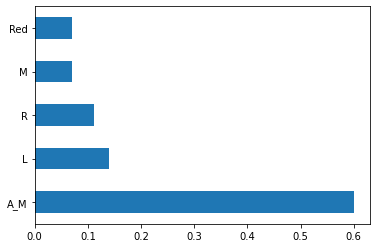

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
feat = pd.Series(model.feature_importances_ , index = x.columns)
feat.nlargest(5).plot(kind='barh')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2)

In [24]:
from sklearn.ensemble import RandomForestRegressor
rf_ran = RandomForestRegressor()

In [25]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [28]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [29]:
rf = RandomForestRegressor()

In [30]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [31]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  11.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  17.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  14.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  13.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [32]:
predictions=rf_random.predict(x_test)

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Type', ylabel='Density'>

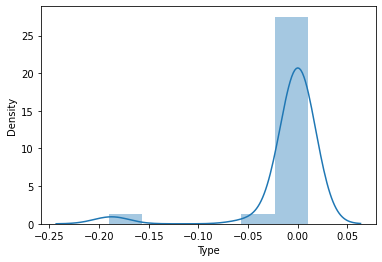

In [33]:
sns.distplot(y_test-predictions)

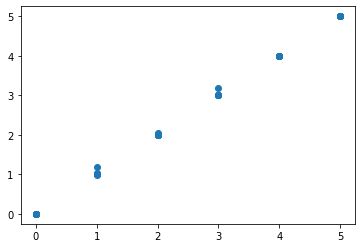

In [34]:
plt.scatter(y_test,predictions)

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.009791666666666657
MSE: 0.0015328124999999995
RMSE: 0.039151149408414555


In [36]:
import pickle
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)
file.close()